In [172]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
def g(x):
    m = 2
    k = 2
    return np.e**(-k*np.sin(m*x)) + k*np.cos(m*x)
a = -np.pi
b = 2 * np.pi

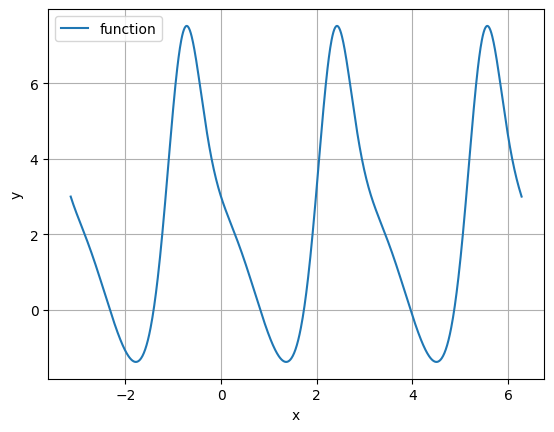

In [174]:
def fun_painter(a, b, func, names, points = None):
    plt.figure()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range(len(func)):
        x = np.linspace(a, b, 1000)
        y = func[i](x)
        plt.plot(x, y, label=names[i])
    plt.legend()  
    
    if points is not None:
        plt.plot(points[0], points[1], marker='o', linestyle='')
    plt.show()

fun_painter(a, b, [g], ["function"])

$$
\max_{x \in [a,b]} |F(x) - P_n(x)|
$$

In [175]:
def generate_regular(a, b, f, n):
    x = np.linspace(a, b, n)
    y = f(x)
    return x, y

thousand_test_points = np.linspace(a, b, 1000) 

In [176]:
def generate_chebyshev(a, b, f, n):
    x = []
    for k in range(n, 0, -1):
        x.append(.5*(a+b) + .5*(b-a)*np.cos((2*k-1)*np.pi/(2*n)))
    x = np.array(x)
    y = f(x)
    return x, y

In [177]:
def lagrange(xs, ys):
    L = [0] * len(xs)
    for i in range(len(xs)):
        m = 1
        for xk in xs:
            if xs[i] != xk:
                m *= (xs[i]-xk)
        L[i] = (ys[i]/m)
        
    def f(x):
        res = 0
        for j in range(len(xs)):
            fun = 1
            for xl in xs:
                if xs[j] != xl:
                    fun *= (x - xl)
            res += L[j] * fun
        return res
    return f

In [178]:
def newton(xs, ys):
    l = len(xs)
    f_arr = [[ys[i]] for i in range(l)]
    for i in range(1, l):
        for j in range(1, i+1):
            f_arr[i].append((f_arr[i][j-1] - f_arr[i-1][j-1]) / (xs[i] - xs[i-j]))
    def f(x):
        y = ys[0]
        for ii in range(1, l):
            temp = f_arr[ii][ii]
            for jj in range(ii):
                temp *= (x - xs[jj])
            y += temp
        return y
    return f

In [179]:
def max_diff(p, f=g, points=thousand_test_points):
    res = 0
    for i in points:
        res = max(res, abs(f(i) - p(i)))
    return res

In [180]:
def sum_diff(p, f=g, points=thousand_test_points):
    res = 0
    for i in points:
        res += (f(i) - p(i)) ** 2
    return res / len(points)

In [181]:
def generate_summary(n):
    pr = generate_regular(a, b, g, n)
    f_l = lagrange(*pr)
    f_n = newton(*pr)
    fun_painter(a, b, [f_l, f_n, g], ["Lagrange","Newton", "Original"], pr)
    print("------------------------------RÓWNOLEGŁE------------------------------")
    print("Maksymalna różnica lagrange: ", max_diff(f_l))
    print("Maksymalna różnica newton: ", max_diff(f_n))
    print("Błąd średni kwadratowy lagrange: ", sum_diff(f_l))
    print("Błąd średni kwadratowy newton: ", sum_diff(f_n))
    print("----------------------------------------------------------------------")
    
    pc = generate_chebyshev(a, b, g, n)
    f_l = lagrange(*pc)
    f_n = newton(*pc)
    fun_painter(a, b, [f_l, f_n, g], ["Lagrange", "Newton", "Original"], pc)
    print("------------------------------CZEBYSZEW------------------------------")
    print("Maksymalna różnica lagrange: ", max_diff(f_l))
    print("Maksymalna różnica newton: ", max_diff(f_n))
    print("Błąd średni kwadratowy lagrange: ", sum_diff(f_l))
    print("Błąd średni kwadratowy newton: ", sum_diff(f_n))
    print("----------------------------------------------------------------------")

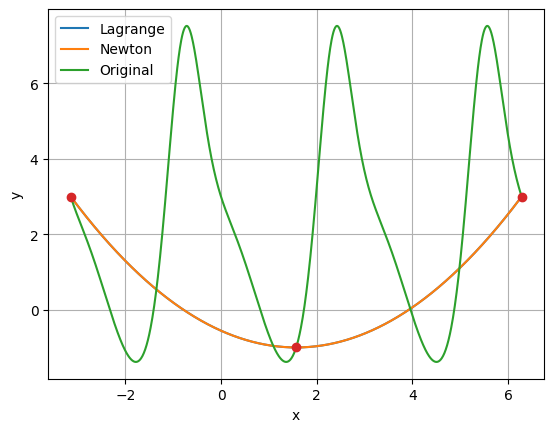

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica lagrange:  8.394013926732452
Maksymalna różnica newton:  8.394013926732452
Błąd średni kwadratowy lagrange:  13.003185068021134
Błąd średni kwadratowy newton:  13.003185068021134
----------------------------------------------------------------------


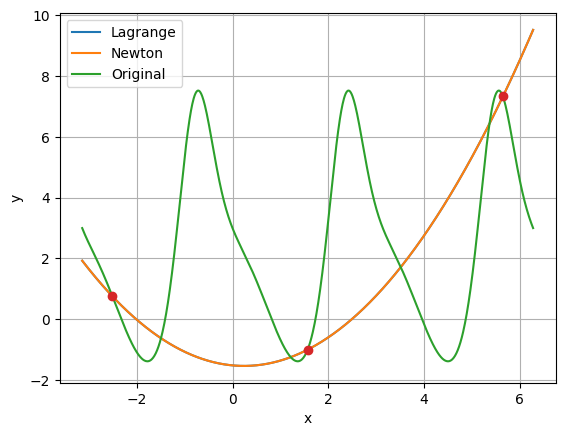

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica lagrange:  8.786379604107893
Maksymalna różnica newton:  8.786379604107893
Błąd średni kwadratowy lagrange:  15.05924447386428
Błąd średni kwadratowy newton:  15.059244473864277
----------------------------------------------------------------------


In [182]:
generate_summary(3)

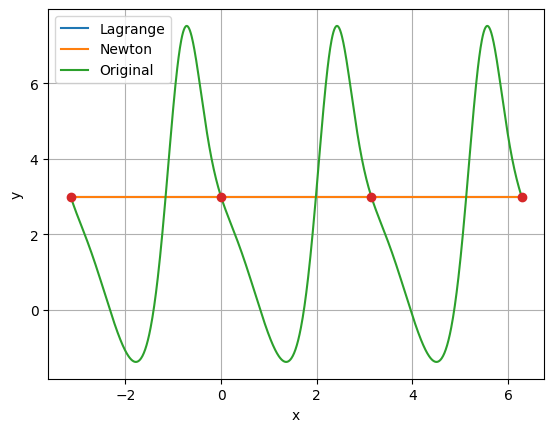

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica lagrange:  4.525020343757953
Maksymalna różnica newton:  4.525020343757953
Błąd średni kwadratowy lagrange:  8.615785727981798
Błąd średni kwadratowy newton:  8.615785727981798
----------------------------------------------------------------------


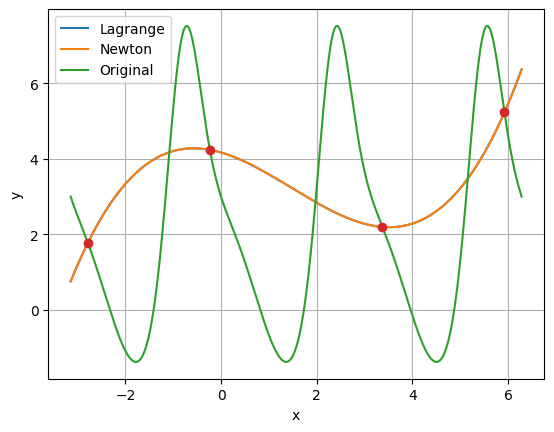

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica lagrange:  5.0473214070195915
Maksymalna różnica newton:  5.0473214070195915
Błąd średni kwadratowy lagrange:  8.555278691715593
Błąd średni kwadratowy newton:  8.555278691715596
----------------------------------------------------------------------


In [183]:
generate_summary(4)

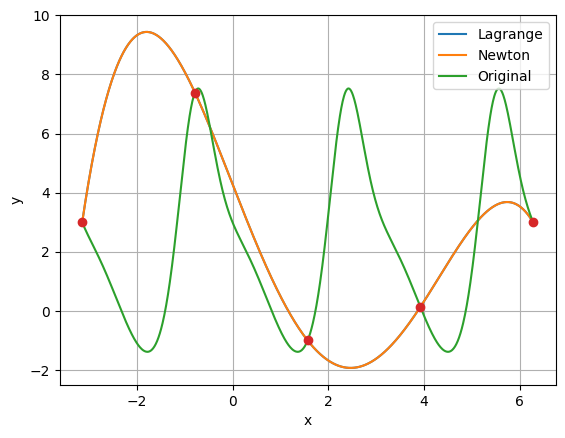

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica lagrange:  10.82196771586059
Maksymalna różnica newton:  10.821967715860593
Błąd średni kwadratowy lagrange:  23.675605514145005
Błąd średni kwadratowy newton:  23.675605514145005
----------------------------------------------------------------------


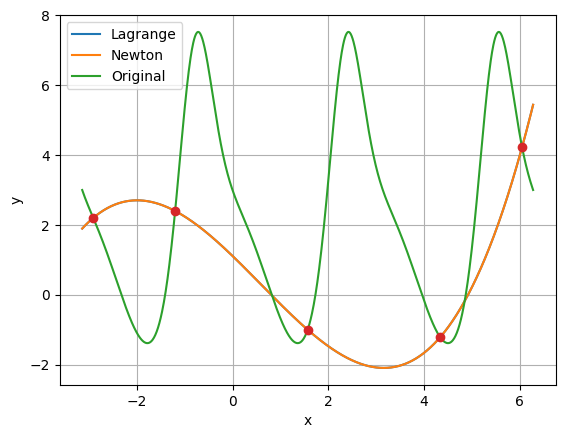

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica lagrange:  9.354852240912068
Maksymalna różnica newton:  9.354852240912068
Błąd średni kwadratowy lagrange:  13.594786709150872
Błąd średni kwadratowy newton:  13.594786709150874
----------------------------------------------------------------------


In [184]:
generate_summary(5)

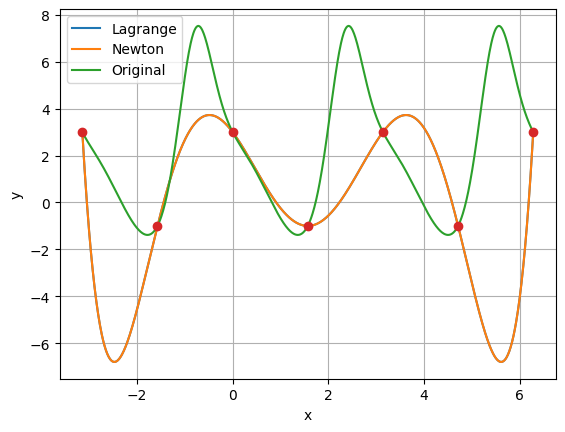

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica lagrange:  14.301405581282228
Maksymalna różnica newton:  14.30140558128224
Błąd średni kwadratowy lagrange:  24.72120040868956
Błąd średni kwadratowy newton:  24.72120040868956
----------------------------------------------------------------------


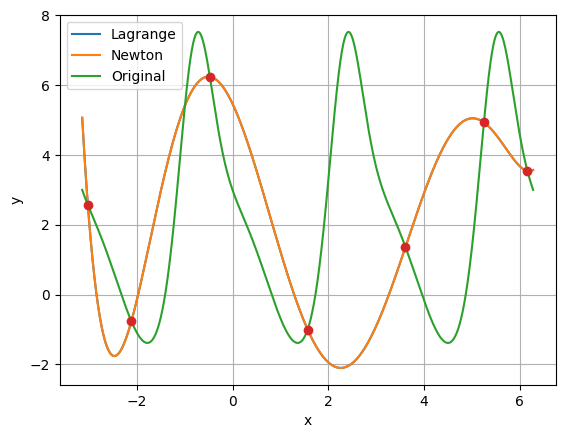

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica lagrange:  9.567346045572602
Maksymalna różnica newton:  9.567346045572613
Błąd średni kwadratowy lagrange:  12.655197409260028
Błąd średni kwadratowy newton:  12.655197409260037
----------------------------------------------------------------------


In [185]:
generate_summary(7)

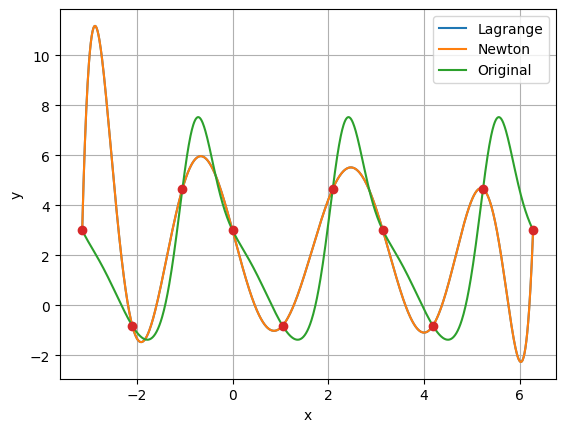

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica lagrange:  9.130733689673296
Maksymalna różnica newton:  9.130733689673301
Błąd średni kwadratowy lagrange:  8.412687362178366
Błąd średni kwadratowy newton:  8.412687362178309
----------------------------------------------------------------------


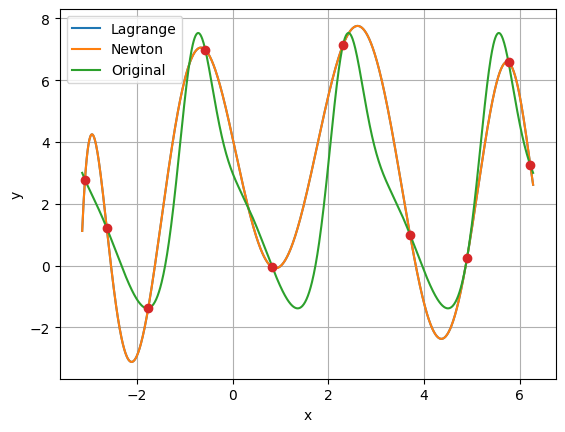

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica lagrange:  3.646291076525155
Maksymalna różnica newton:  3.6462910765251433
Błąd średni kwadratowy lagrange:  2.399210328243638
Błąd średni kwadratowy newton:  2.399210328243664
----------------------------------------------------------------------


In [186]:
generate_summary(10)

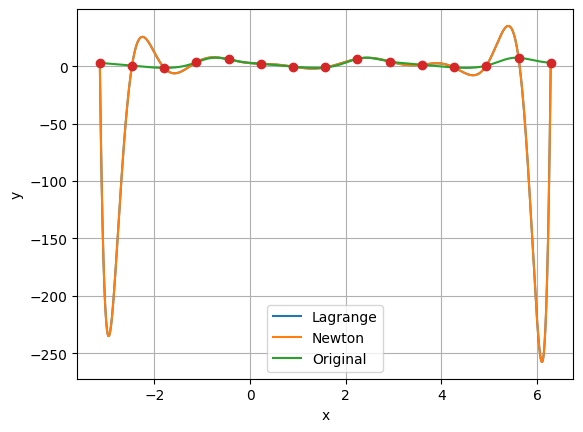

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica lagrange:  261.55550944407656
Maksymalna różnica newton:  261.55550944432304
Błąd średni kwadratowy lagrange:  3779.73809994504
Błąd średni kwadratowy newton:  3779.7380999450115
----------------------------------------------------------------------


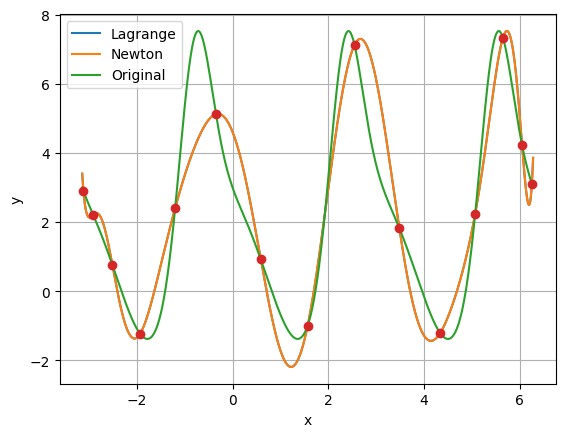

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica lagrange:  3.20128791213871
Maksymalna różnica newton:  3.201287912138712
Błąd średni kwadratowy lagrange:  1.2847562407315347
Błąd średni kwadratowy newton:  1.284756240731285
----------------------------------------------------------------------


In [187]:
generate_summary(15)

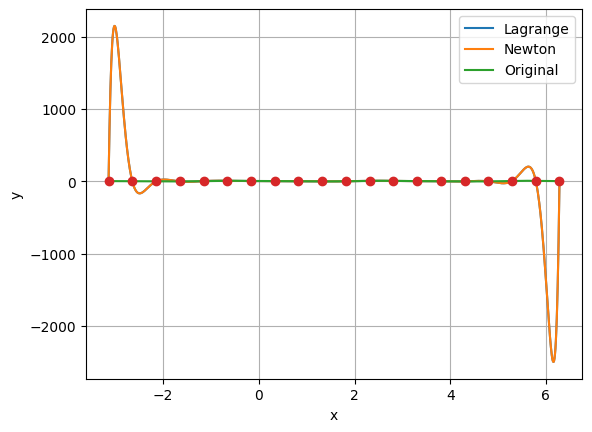

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica lagrange:  2500.879794356098
Maksymalna różnica newton:  2500.8797943424574
Błąd średni kwadratowy lagrange:  230142.5547129364
Błąd średni kwadratowy newton:  230142.55471269364
----------------------------------------------------------------------


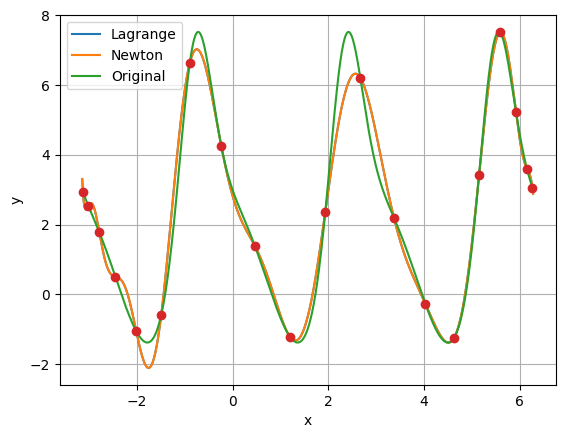

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica lagrange:  1.610729103232626
Maksymalna różnica newton:  1.6107291032279436
Błąd średni kwadratowy lagrange:  0.20866032298472917
Błąd średni kwadratowy newton:  0.20866032294099604
----------------------------------------------------------------------


In [188]:
generate_summary(20)

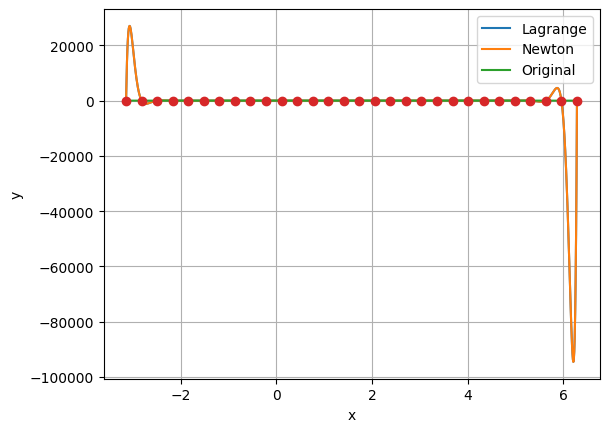

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica lagrange:  94527.81113661516
Maksymalna różnica newton:  94527.81109213637
Błąd średni kwadratowy lagrange:  124994270.07098387
Błąd średni kwadratowy newton:  124994270.12697047
----------------------------------------------------------------------


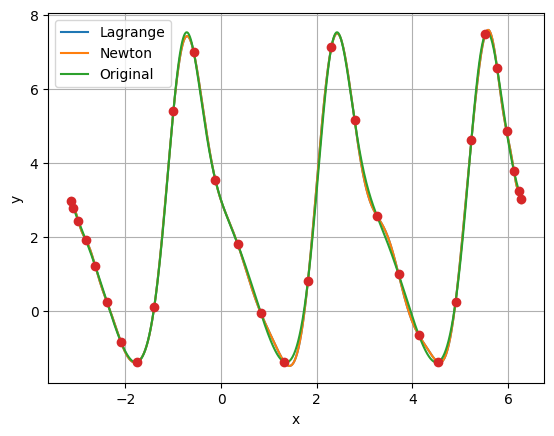

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica lagrange:  0.22718120692845334
Maksymalna różnica newton:  0.22718120700894873
Błąd średni kwadratowy lagrange:  0.007787000685605445
Błąd średni kwadratowy newton:  0.007787043467799464
----------------------------------------------------------------------


In [189]:
generate_summary(30)

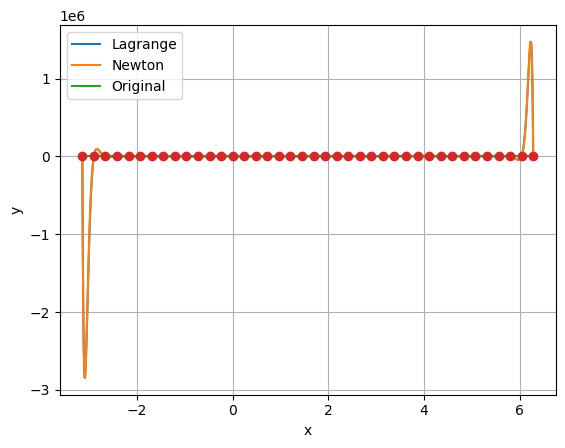

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica lagrange:  2847234.038575416
Maksymalna różnica newton:  2847234.0385758625
Błąd średni kwadratowy lagrange:  94408824274.78775
Błąd średni kwadratowy newton:  94408810923.87975
----------------------------------------------------------------------


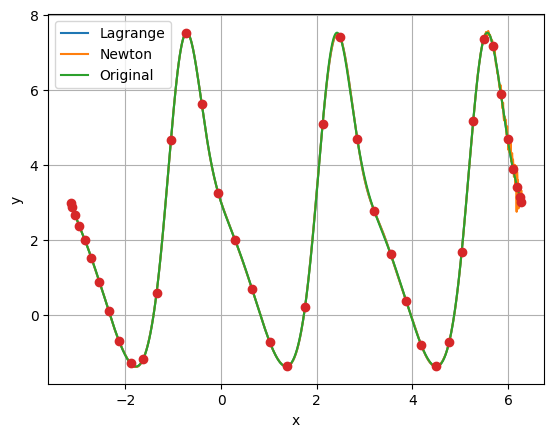

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica lagrange:  0.06495999255807838
Maksymalna różnica newton:  0.7223367485082646
Błąd średni kwadratowy lagrange:  0.00032603318054181857
Błąd średni kwadratowy newton:  0.00278026450090013
----------------------------------------------------------------------


In [190]:
generate_summary(40)

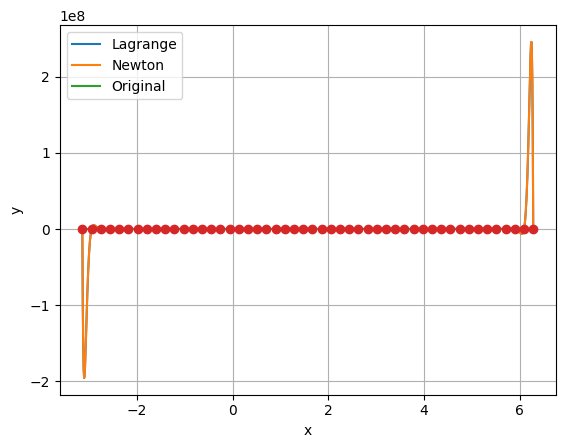

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica lagrange:  245756535.42945084
Maksymalna różnica newton:  245757949.44034824
Błąd średni kwadratowy lagrange:  694374925916003.2
Błąd średni kwadratowy newton:  694377184260233.8
----------------------------------------------------------------------


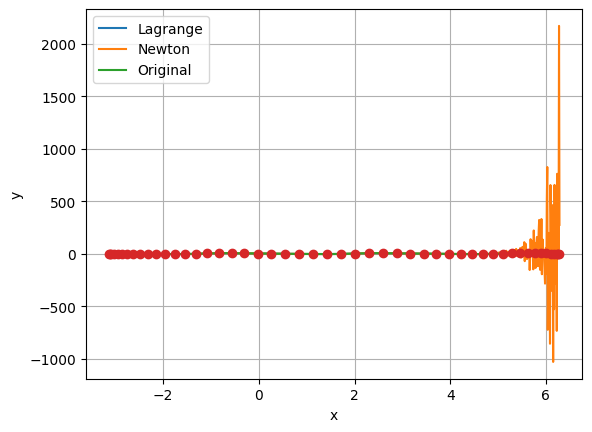

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica lagrange:  0.007789427147282035
Maksymalna różnica newton:  2169.3190277280746
Błąd średni kwadratowy lagrange:  6.5239303658950075e-06
Błąd średni kwadratowy newton:  13137.33132360544
----------------------------------------------------------------------


In [191]:
generate_summary(50)